<a href="https://colab.research.google.com/github/wallacecarlis/data_science/blob/main/PROJETO_1_ANALISE_DE_DADOS_AIR_BNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

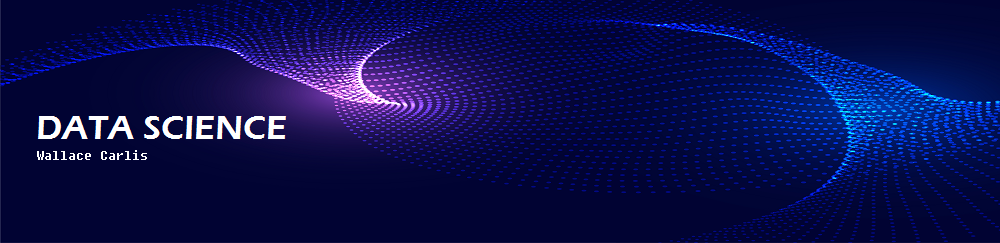

## **Projeto 1 - Análise de Dados - AirBnB - San Francisco**

O **Airbnb** é uma empresa americana que opera **on-line** um mercado para **estadias** e **experiências** de casas de família de curto e longo prazo. Ela foi iniciada com a locação de um **colchão de ar** numa sala que se transformou em uma espécie de **pousada** em **2007**. No ano seguinte o **produto** foi oferecido com **café da manhã** para quem não conseguia reservas no **saturado mercado de hospedagem**. Hoje o **Airbnb** é considerada uma das maiores empresas hoteleiras do mundo sem possuir **nenhum** hotel próprio.

Em 2020 a empresa valia cerca de **U$ 18 bilhões**, e em 2023 contava com pouco mais de **6000** funcionários.

Com relação à **ciência de dados**, uma das iniciativas do **Airbnb** é disponibilizar seus **dados de locações** de algumas das principais cidades do mundo. Por meio do portal **[Inside Airbnb](https://insideairbnb.com/get-the-data/)** é possível acessá-los. No nosso caso, analisaremos os dados de locações da cidade de **San Francisco**, na Califórnia, EUA.

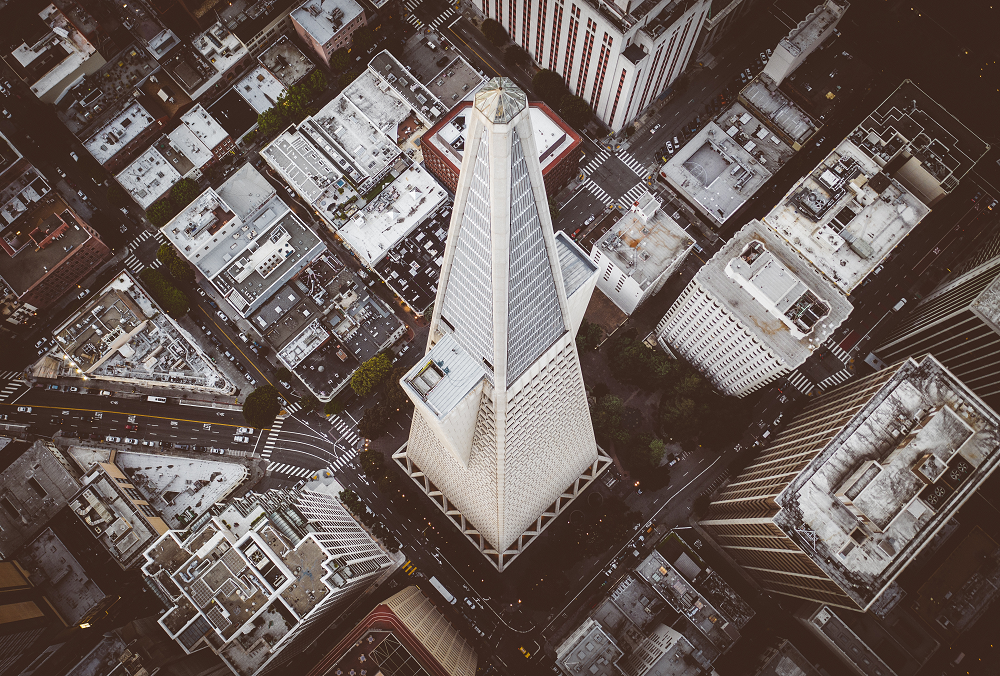

Quando se pensa na **questão turística** vale a pena destacar os principais pontos:

-  Cruzeiro na **Baía Golden Gate** (bairro de Fisherman's Wharf) e Ilha de **Alcatraz**;
-  **Zoológico** de San Francisco e **Jardim Botânico** (bairros de Richmond e Sunset District);
-  Passeio na **Rodovia 1** (costa do Pacífico passando por bairros como Sunset District, Outer Richmond e Sea Cliff);
-  Circuito **gastronômico** e museu de **arte moderna** (South of Market);
-  Passeio de **bonde** (Nob Hill e Russian Hill) e **Chinatown** (Nob Hill e Financial District);

Vamos iniciar nosso projeto **importando** as bibliotecas necessárias para a **análise exploratória dos dados**.

In [28]:
# 1 - Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "svg"
plt.rcParams["font.family"] = "sans-serif"

**Acessando** a base de dados:
- Iniciaremos verificando as principais informações da base de dados.

In [29]:
# 2 - Acessando a base de dados
df = pd.read_csv("https://raw.githubusercontent.com/wallacecarlis/arquivos_ml/main/listings.csv")

In [30]:
# 3 - Verificando a quantidade de linhas e colunas
df.shape

(8361, 18)

In [31]:
# 4 - Verificando os nomes das colunas
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [32]:
# 5 - Verificando os tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8361 entries, 0 to 8360
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8361 non-null   int64  
 1   name                            8361 non-null   object 
 2   host_id                         8361 non-null   int64  
 3   host_name                       8361 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8361 non-null   object 
 6   latitude                        8361 non-null   float64
 7   longitude                       8361 non-null   float64
 8   room_type                       8361 non-null   object 
 9   price                           6774 non-null   float64
 10  minimum_nights                  8361 non-null   int64  
 11  number_of_reviews               8361 non-null   int64  
 12  last_review                     61

Significado de cada coluna:

-  id - número de id gerado cuja finalidade é identificar o imóvel;
-  name - nome da propriedade anunciada;
-  host_id - número de id do proprietário (anfitrião) da propriedade;
-  host_name - nome do anfitrião;
-  neighbourhood_group - esta coluna não possui valor válido;
-  neighbourhood - nome do bairro;
-  latitude - coordenada da latitude do imóvel;
-  longitude - coordenada da longitude do imóvel;
-  room_type - informação sobre o tipo de quarto que é ofertado;
-  price - preço para alugar o imóvel;
-  minimum_nights - período mínimo de noites por reserva;
-  number_of_reviews - número de reviews que o imóvel possui;
-  last_review - data do último review;
-  reviews_per_month - quantidade de reviews por mês;
-  calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião;
-  availability_365 - número de dias disponíveis em 365 dias.

In [33]:
# 6 - Visualizando as primeiras linhas da base de dados
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1094764,San Francisco Presidio Paradise!,172460,Leila,NaN,Inner Richmond,37.788140,-122.465470,Entire home/apt,150.0,30,1,2021-10-31,0.03,2,365,0,NaN
1,38047206,52 Vesta home,92965890,唱,NaN,Bayview,37.729800,-122.400960,Private room,NaN,90,0,NaN,NaN,1,0,0,NaN
2,43475468,Beautiful Mission District Home and Backyard,65136730,Ryan,NaN,Mission,37.757210,-122.412450,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN
3,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,226555948,Gi'Angelo,NaN,Excelsior,37.726761,-122.408522,Private room,69.0,30,6,2024-01-13,0.33,13,216,3,2022-003280STR
4,47918229,"Blueground | Marina District, w/d, nr parks",107434423,Blueground,NaN,Marina,37.803660,-122.445180,Entire home/apt,246.0,31,0,NaN,NaN,183,341,0,NaN


**Valores NaN (nulos ou ausentes)**:
- A verificação de valores **nulos** é imprescindível para compreensão de sua existência, assim como sua correção, para evitar os possíveis erros na análise.

In [34]:
# 7 - Verificando a existência de valores NaN (nulos / ausentes)
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               8361
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1587
minimum_nights                       0
number_of_reviews                    0
last_review                       2164
reviews_per_month                 2164
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2957
dtype: int64

Como observado acima, a coluna **neighbourhood_group** está com todos os seus valores **ausentes**, ou seja, **100%** de valores **nulos**. No caso, iremos **excluí-la**. O mesmo faremos com as **linhas** com **dados ausentes** da coluna **price**. Claro, poderíamos obter **média ou mediana** dos valores das locações dos bairros e preencher os **valores ausentes** com tais valores. Entretanto, não será o foco **deste projeto**. Já as demais colunas, que também apresentam **ausências** - (last_review, reviews_per_month e license) - precisarão de mais compreensão sobre quais perguntas deveremos responder sobre o negócio. Portanto, caberia bem mais **investigação e análise**.

Excluindo a coluna **neighbourhood_group**:
 - Utilizaremos o método **drop** para exclusão da coluna.

In [35]:
# 8 - Excluindo a coluna neighbourhood_group com o método drop
df.drop("neighbourhood_group", axis = 1, inplace = True)

Excluindo os valores **NaN**:
 - Utilizaremos o método **dropna** para a exclusão das linhas com **valores ausentes** pela coluna **price**.

In [36]:
# 9 - Excluindo as linhas com valores nan pela coluna price (onde não há preços), com o método dropna
df.dropna(subset = ["price"], inplace = True)

**Resumo Estatístico**:

- Uma vez que realizamos as **exclusões** necessárias, verificaremos o **resumo estatístico** para nossa primeira compreensão sobre seus **valores**. Utilizaremos o método **describe** para isso.

In [37]:
# 10 - Verificando o resumo estatístico das colunas com valores numéricos
df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "calculated_host_listings_count", "availability_365"]].describe().round()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6774.0,6774.0,6774.0,5064.0,6774.0,6774.0
mean,216.0,19.0,51.0,1.0,50.0,205.0
std,469.0,44.0,107.0,2.0,109.0,123.0
min,10.0,1.0,0.0,0.0,1.0,0.0
25%,100.0,2.0,0.0,0.0,1.0,90.0
50%,150.0,3.0,7.0,1.0,3.0,215.0
75%,224.0,30.0,49.0,2.0,20.0,322.0
max,25000.0,500.0,1166.0,35.0,379.0,365.0


Olhando para o **resumo estatístico**, de acordo com a coluna **minimum_nights**, podemos perceber que **50%** das locações ocorrem em até **3** diárias, e que **75%** ocorrem em períodos de até **30 dias**. Nos parece que temos **2 grupos** específicos de locatários. Além disso, de acordo com a coluna **price**, para essa primeira análise, o valor da **mediana (50%)** das locações é de **150** dólares, sendo que existe um valor máximo de **25 mil** dólares. Vamos realizar algumas **visualizações gráficas** para melhor **compreensão dos dados**.

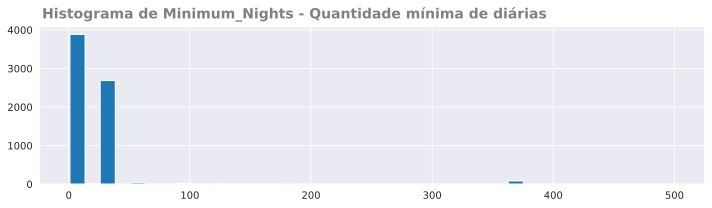

In [38]:
# 11 - Plotando histograma da coluna "minimum_nights"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
ax.hist("minimum_nights", data = df, bins = 40)
ax.text(-22, 4300, "Histograma de Minimum_Nights - Quantidade mínima de diárias",
             color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()

O gráfico de **histograma** acima nos mostra uma grande concentração da quantidades de locações muito **abaixo de 100** diárias. Ou seja, visualmente mais perto das **30 diárias**, confirmando os dados do nosso **resumo estatístico**. Outra possibilidade de **visualização** sobre a distribuição dos dados é o gráfico **boxplot**.

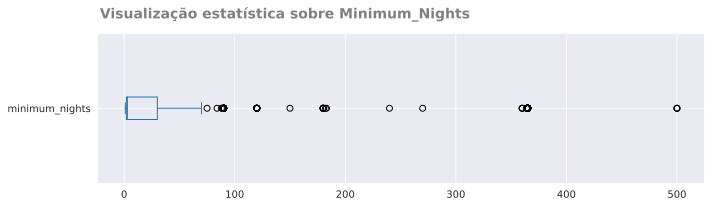

In [39]:
# 12 - Plotando o boxplot da coluna "minimum_nights"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
df.minimum_nights.plot(kind = "box", vert = False, ax = ax)
ax.text(-22, 1.6, "Visualização estatística sobre Minimum_Nights", color = "grey", fontsize = 14, fontweight = "bold")
ax.set_ylabel("")
plt.tight_layout()

In [40]:
# 13 - Quantidade de locações por período de locação até 30 dias:
print(f"Quantidade total de locações até 30 dias pela coluna minimum_nights: {(len(df[df.minimum_nights <= 30]))}.")
print("Percentual de correspondência da base de dados: {:.2f}%.".format((len(df[df.minimum_nights <= 30]) / df.shape[0])*100))

Quantidade total de locações até 30 dias pela coluna minimum_nights: 6322.
Percentual de correspondência da base de dados: 93.33%.


Com o gráfico **boxplot** acima podemos **ratificar** que a quantidade mínima de noites pela coluna **minimum_nights** está concentrada nos primeiros valores. Portanto, existe uma boa quantidade de **outliers**, que são valores discrepantes do padrão. De forma mais detalhada, em conjunto com o **resumo estatístico**, verificamos ainda que as locações até **30** noites são responsáveis por cerca de **93%** das ocorrências.

Para melhorarmos nossa **análise exploratória**, uma boa prática é gerarmos uma **cópia** da base de dados para nossos **tratamentos** necessários.

In [41]:
# 14 - Gerando uma cópia da base de dados
df_copia = df.copy()

Aprofundaremos nossos tratamentos excluindo os valores **outliers** da coluna **minimum_nights**, ou seja, valores superiores a **30 diárias**. Vamos ainda visualizar a **distribuição** desta nova base de dados.

In [42]:
# 15 - Removendo os valores "outliers" da coluna minimum_nights
df_copia.drop(df_copia[df_copia.minimum_nights > 30].index, axis = 0, inplace = True)

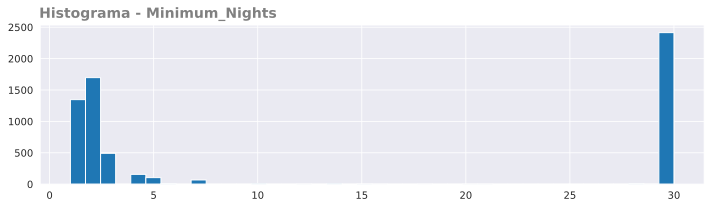

In [43]:
# 17 - Plotando um histograma da coluna "minimum_nights" sem "outliers"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
sns.set_style()
ax.hist("minimum_nights", data = df_copia, bins = 40)
ax.text(-0.5, 2650, "Histograma - Minimum_Nights", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()

Percebemos nitidamente que temos **2 grupos** de locatários. Um deles é o que normalmente realiza locações até perto de **10 dias**, sendo mais específico, **7 dias**, já o outro grupo loca por cerca de **30** dias. Vamos realizar uma nova separação na base de dados entre os dois grupos. As bases serão **df_7** e **df_30**.

In [44]:
# 18 - Separando a base de dados
df_7 = df_copia.loc[df_copia.minimum_nights <= 7]
df_30 = df_copia.loc[df_copia.minimum_nights > 7]

Visualizaremos os dados estatísticos com o **boxplot** para os dois grupos.

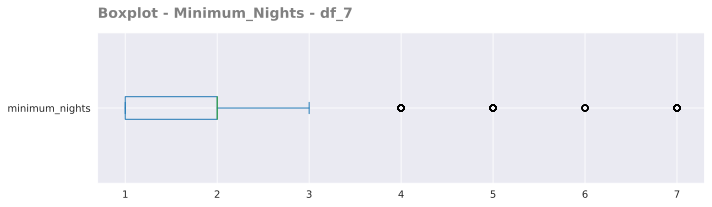

In [45]:
# 19 - Boxplot da coluna "minimum_nights" para a base df_7
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
df_7.minimum_nights.plot(kind = "box", vert = False, ax = ax)
ax.text(0.7, 1.6, "Boxplot - Minimum_Nights - df_7", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_ylabel("")
plt.tight_layout()

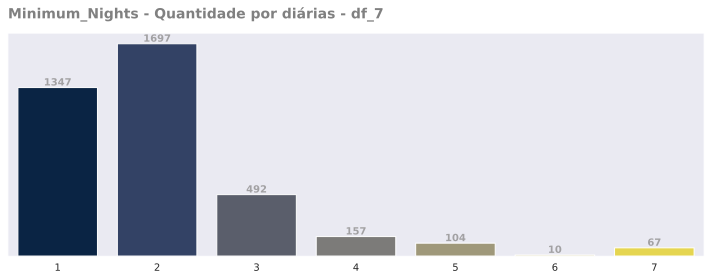

In [46]:
# 20 - Countplot com a contagem por dia
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 4), dpi = 150)
sns.set_style()
barras = sns.countplot(x = "minimum_nights", data = df_7, ax = ax, palette = "cividis",
                       hue = "minimum_nights", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_height()),
              xy = (i.get_x() + i.get_width() / 2,
                    i.get_height()),
              color = "#A2A1A3",
              fontweight = "semibold",
              ha = "center",
              va = "bottom")

plt.gca().axes.get_yaxis().set_visible(False)
ax.text(-0.5, 1900, "Minimum_Nights - Quantidade por diárias - df_7", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()

Percebemos nitidamente nos dois gráficos acima que a grande maioria das locações deste grupo ocorre nos **2 primeiros dias**, inclusive, sendo este o valor da **mediana** no **boxplot**.

Verificaremos agora como estão as principais **informações, distribuições e valores** por **bairros** de ambas as bases. Começaremos pela base **df_7**.

DF_7

In [47]:
# 21 - Verificando os nomes dos bairros da base df_7 com o método unique
df_7.neighbourhood.unique()

array(['Presidio Heights', 'Bernal Heights', 'Castro/Upper Market',
       'Potrero Hill', 'Crocker Amazon', 'Inner Sunset', 'Noe Valley',
       'Mission', 'Downtown/Civic Center', 'Bayview', 'Parkside',
       'Seacliff', 'Ocean View', 'Marina', 'Visitacion Valley',
       'Pacific Heights', 'Western Addition', 'Haight Ashbury',
       'West of Twin Peaks', 'South of Market', 'Outer Sunset',
       'Russian Hill', 'Chinatown', 'Twin Peaks', 'Financial District',
       'Nob Hill', 'Outer Richmond', 'Glen Park', 'Excelsior',
       'North Beach', 'Lakeshore', 'Outer Mission', 'Presidio',
       'Inner Richmond', 'Diamond Heights', 'Golden Gate Park'],
      dtype=object)

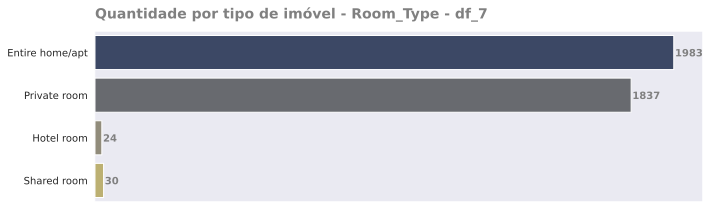

In [48]:
# 22 - Verificando a quantidade de tipo de imóvel para locação na base df_7
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)
barras = sns.countplot(y = "room_type", data = df_7, ax = ax, orient = "h", palette = "cividis",
                       hue = "room_type", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = (((i.get_width() + 5) - (i.get_height())),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "grey", fontweight = "bold",
                     ha = "left")

plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Quantidade por tipo de imóvel - Room_Type - df_7", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()

A maior quantidade de locações para a base **df_7** está entre **apartamento ou casa individuais (Entire home/apt)** e **quartos individuais (Private room)**. Hotel completo e **quarto compartilhado** tem locações mínimas na cidade de **San Francisco**.

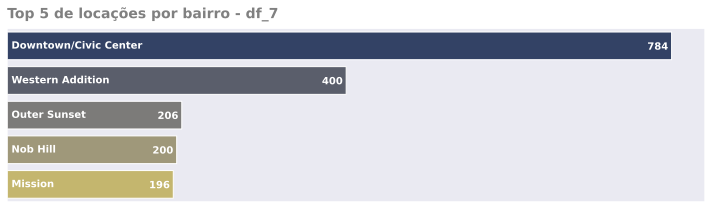

In [49]:
# 23 - Plotando a quantidade de locações por bairros
imoveis = df_7.groupby(["neighbourhood"]).size().sort_values(ascending = False)[:5]
imoveis = pd.DataFrame(imoveis, columns = ["values"])
imoveis.reset_index(inplace = True)

fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)
sns.set_style()
barras = sns.barplot(x = "values", y = "neighbourhood", data = imoveis, ax = ax, palette = "cividis",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = ((i.get_width() - (i.get_height() * 5)),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "white", fontweight = "bold",
                     ha = "right")

for i in range(len(imoveis)):
  bairro = imoveis.iloc[i, 0]
  valor = imoveis.iloc[i, 1]
  ax.text(valor - valor + 5, i, bairro, fontsize = 10, fontweight = "bold", color = "white", va = "center")

plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
ax.text(0, -0.8, "Top 5 de locações por bairro - df_7", fontsize = 14, color = "grey", fontweight = "bold")

ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()

As maiores quantidades de locações estão em **Downtown/Civic Center** e **Western Addition**, bairros centrais mais ao norte da cidade, que ficam praticamente um de cada lado da **rodovia 101**, estrada que vai para **Los Angeles** ao sul.

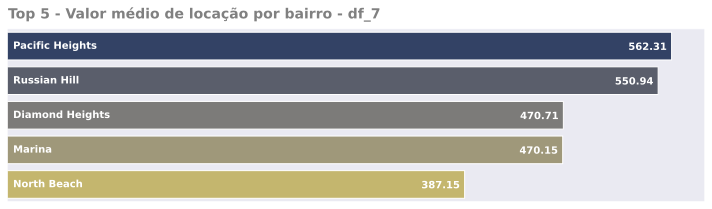

In [50]:
# 24 - Visualizando a "média" de preços por bairros ordenando pelo maior valor
price_mean = round(df_7.groupby(["neighbourhood"]).price.mean().sort_values(ascending = False)[:5], 2)
price_mean = pd.DataFrame(price_mean)
price_mean.reset_index(inplace = True)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)

barras = sns.barplot(x = "price", y = "neighbourhood", data = price_mean, ax = ax, palette = "cividis",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(i.get_width(),
              xy = ((i.get_width() - (i.get_height() * 5)),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
              va = "center_baseline",
              color = "white",
              fontweight = "bold",
              ha = "right")

for i in range(len(price_mean)):
  bairro = price_mean.iloc[i, 0]
  valor = price_mean.iloc[i, 1]
  ax.text(valor - valor + 5, i, bairro, fontsize = 10, fontweight = "bold", color = "white", va = "center")

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Top 5 - Valor médio de locação por bairro - df_7", fontsize = 14, color = "grey", fontweight = "bold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()

Os maiores valores médios para locação estão no norte da cidade, caminho para a ponte **Golden Gate** e **ilha de Alcatraz**. A exceção é o bairro de **Diamond Heights**, literalmente no centro da cidade, ao lado do **Glen Canyon Park**.
Por fim, analisaremos os dados da base **df_30**.

DF_30

In [51]:
# 25 - Verificando os nomes dos bairros da base df_7 com o método unique
df_30.neighbourhood.unique()

array(['Inner Richmond', 'Excelsior', 'Castro/Upper Market',
       'South of Market', 'Outer Mission', 'Pacific Heights', 'Marina',
       'Financial District', 'Mission', 'Outer Sunset', 'Potrero Hill',
       'Bernal Heights', 'North Beach', 'Downtown/Civic Center',
       'Western Addition', 'Russian Hill', 'Haight Ashbury', 'Noe Valley',
       'Nob Hill', 'Inner Sunset', 'Parkside', 'Visitacion Valley',
       'Bayview', 'Crocker Amazon', 'Outer Richmond', 'Ocean View',
       'Presidio Heights', 'Glen Park', 'Chinatown', 'Lakeshore',
       'Twin Peaks', 'Diamond Heights', 'West of Twin Peaks', 'Presidio',
       'Seacliff', 'Golden Gate Park'], dtype=object)

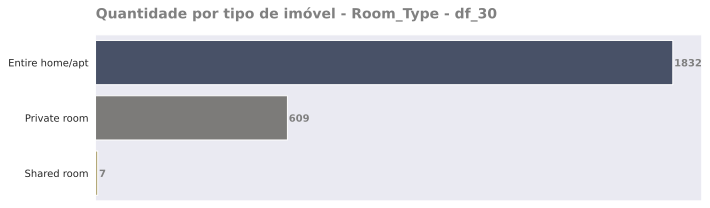

In [52]:
# 26 - Verificando a quantidade de tipo de imóvel para locação na base df_7
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)
barras = sns.countplot(y = "room_type", data = df_30, ax = ax, orient = "h", palette = "cividis",
                       hue = "room_type", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = (((i.get_width() + 5) - (i.get_height())),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "grey", fontweight = "bold",
                     ha = "left")

plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Quantidade por tipo de imóvel - Room_Type - df_30", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()

É mais visível ainda a opção pela **individualidade** frente ao **compartilhamento** para quem loca o imóvel por **30 dias**, cerca de **99%** das locações.

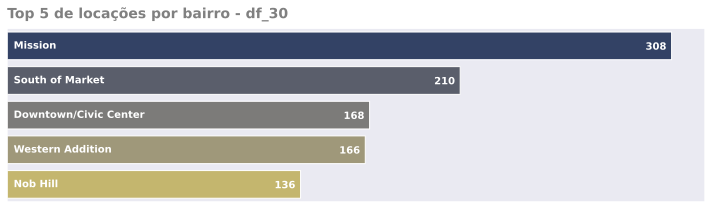

In [53]:
# 27 - Exibindo a "quantidade" de imóveis locados por bairro:
imoveis = df_30.groupby(["neighbourhood"]).size().sort_values(ascending = False)[:5]
imoveis = pd.DataFrame(imoveis, columns = ["values"])
imoveis.reset_index(inplace = True)

fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)
sns.set_style()
barras = sns.barplot(x = "values", y = "neighbourhood", data = imoveis, ax = ax, palette = "cividis",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = ((i.get_width() - (i.get_height() * 3)),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "white", fontweight = "bold",
                     ha = "right")

for i in range(len(imoveis)):
  bairro = imoveis.iloc[i, 0]
  valor = imoveis.iloc[i, 1]
  ax.text(valor - valor + 3, i, bairro, fontsize = 10, fontweight = "bold", color = "white", va = "center")

plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
ax.text(0, -0.8, "Top 5 de locações por bairro - df_30", fontsize = 14, color = "grey", fontweight = "bold")

ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()

Os principais destinos de quem loca por **30 dias** são os bairros do **nordeste** da cidade, cortados pela **rodovia 80** liga a cidade de **Oakland**, por exemplo.

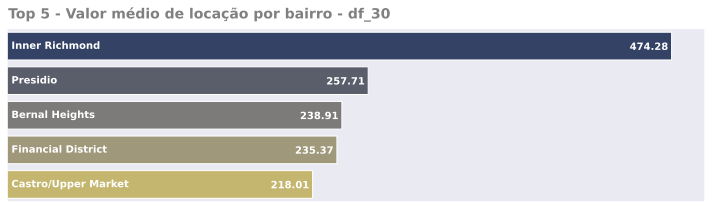

In [54]:
# 28 - Visualizando a "média" de preços por bairros ordenando pelo maior valor
price_mean = round(df_30.groupby(["neighbourhood"]).price.mean().sort_values(ascending = False)[:5], 2)
price_mean = pd.DataFrame(price_mean)
price_mean.reset_index(inplace = True)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)

barras = sns.barplot(x = "price", y = "neighbourhood", data = price_mean, ax = ax, palette = "cividis",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(i.get_width(),
              xy = ((i.get_width() - (i.get_height() * 3)),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
              va = "center_baseline",
              color = "white",
              fontweight = "bold",
              ha = "right")

for i in range(len(price_mean)):
  bairro = price_mean.iloc[i, 0]
  valor = price_mean.iloc[i, 1]
  ax.text(valor - valor + 3, i, bairro, fontsize = 10, fontweight = "bold", color = "white", va = "center")

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Top 5 - Valor médio de locação por bairro - df_30", fontsize = 14, color = "grey", fontweight = "bold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()

Os maiores valores médios de locação estão distribuídos por toda a cidade, sendo o de maior destaque o bairro de **Inner Richmond** ao norte, novamente, caminho para a ponte **Golden Gate**.

**Concluindo:**

A análise exploratório nos deu uma boa compreensão de que existem **2 grupos** distintos que realizam suas locações em bairros que priorizam tanto centros **gastronômicos e artísticos**, quanto pontos **históricos e dinâmicos** pela facilidade rodoviária. Prezou-se pelas informações **gráficas fluidas e diretas**, direcionando a compreensão para os **tipos de imóveis locados**, as principais **quantidades de locações por bairros** e seus **maiores valores médios** por locação. Há ainda espaço para outras análises como **correlações** e opções por **historicidade** dos destinos, entrentanto, como **análise inicial**, houve **satisfação** com o resultado apresentado.